In [ ]:
pip install --upgrade dython

In [ ]:
# Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations


In [ ]:
# Load dataset
df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


In [ ]:
# Summary of Descriptive Statistics for Individuals Diagnosed with Diabetes
df[df['Diabetes_binary'] == 1].describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,35346.0,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,...,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000,35346.000000
mean,1.0,0.752674,0.670118,0.993182,31.944011,0.518220,0.092457,0.222882,0.630538,0.585441,...,0.959769,0.105868,3.290981,4.461806,7.954479,0.371216,0.479121,9.379053,4.745516,5.210094
std,0.0,0.431464,0.470177,0.082292,7.363401,0.499675,0.289675,0.416186,0.482666,0.492653,...,0.196503,0.307673,1.009928,8.947717,11.301491,0.483137,0.499571,2.330273,1.060617,2.217319
min,1.0,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.0,1.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000,3.000000
50%,1.0,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,10.000000,5.000000,6.000000
75%,1.0,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,15.000000,1.000000,1.000000,11.000000,6.000000,7.000000
max,1.0,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
# Check for null values
df.isnull().sum()

,0
Diabetes_binary,0
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


In [ ]:
df.dtypes

,0
Diabetes_binary,int64
HighBP,int64
HighChol,int64
CholCheck,int64
BMI,int64
Smoker,int64
Stroke,int64
HeartDiseaseorAttack,int64
PhysActivity,int64
Fruits,int64


In [ ]:
df=df.astype('category')

In [ ]:
# List of columns with integer data that should be converted to boolean
category_columns = [
    'Diabetes_binary','HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex','BMI','GenHlth','MentHlth','PhysHlth','Age','Education','Income'
]
# Convert these integer columns to boolean
for column in category_columns:
    df[column] = df[column].astype('category')


In [ ]:
df.dtypes

,0
Diabetes_binary,category
HighBP,category
HighChol,category
CholCheck,category
BMI,category
Smoker,category
Stroke,category
HeartDiseaseorAttack,category
PhysActivity,category
Fruits,category


In [ ]:

# Percentage Distribution of Diabetes Diagnosis
df["Diabetes_binary"].value_counts() * 100 / len(df)

,count
Diabetes_binary,
0,50.0
1,50.0


<Figure size 1600x1200 with 0 Axes>

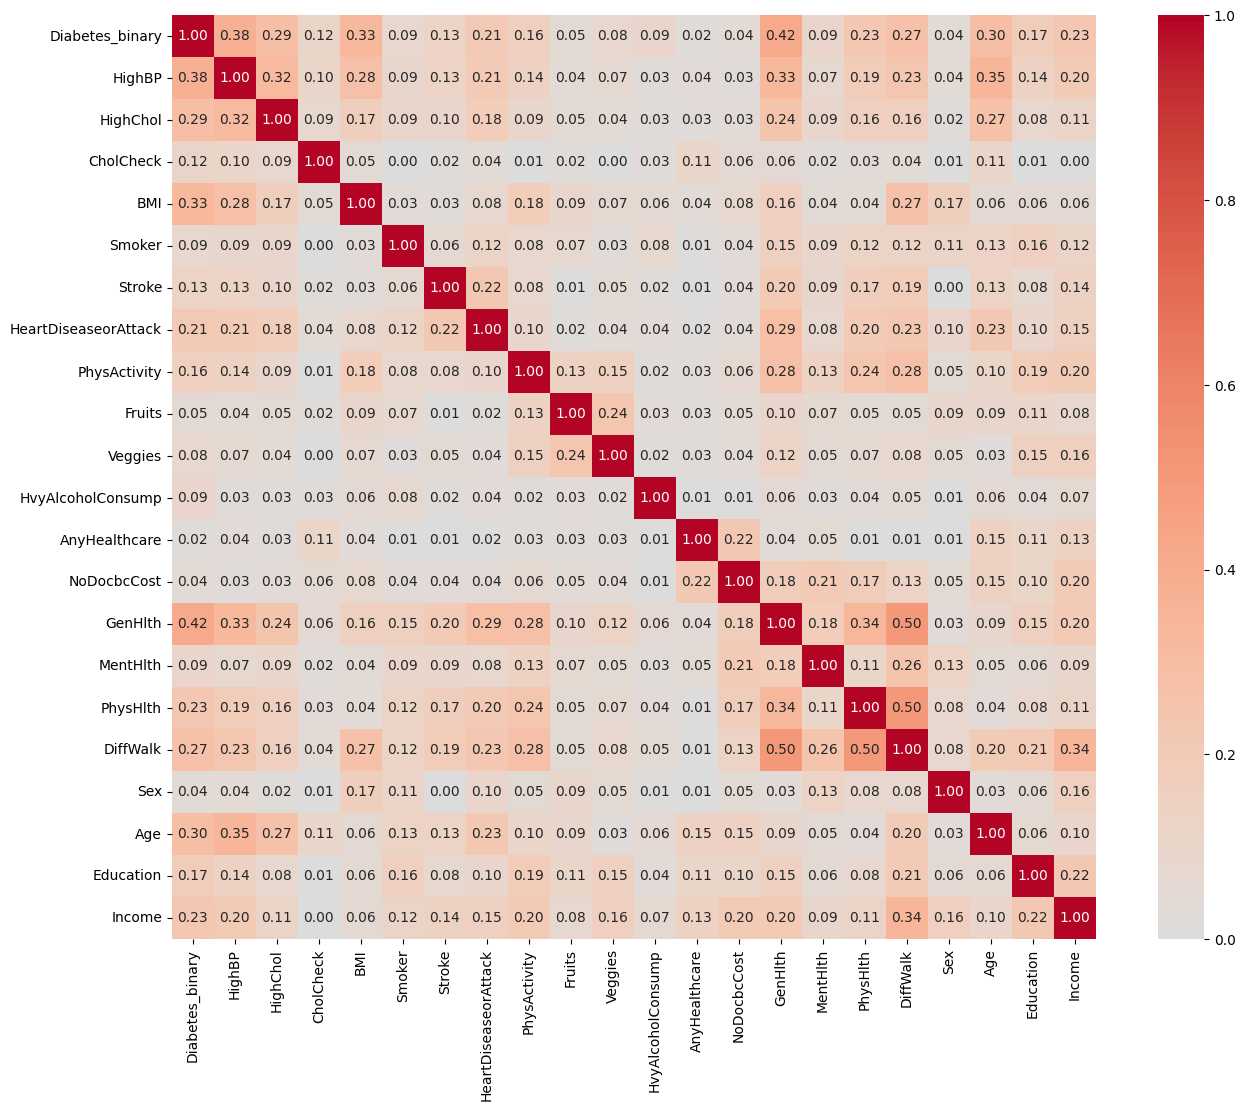

In [ ]:
#Compute the correlation matrix for categorical variables using associations
plt.figure(figsize=(16, 12))  # Set the figure size
nominal_columns = df.select_dtypes(include=['category']).columns.tolist()

# Generate the correlation plot with larger figsize
corr_matrix = associations(df,
                           nominal_columns=nominal_columns,
                           plot=True,
                           cmap="coolwarm",
                           figsize=(16, 12)  # Set the figure size for associations plot
                          )

plt.show()

**From the correlation matrix, I found that General Health, High Blood Pressure (HighBP), Age, BMI, and High Cholesterol (HighChol) are the main factors contributing to diabetes. Poor general health is strongly linked to diabetes, as chronic health issues often accompany the condition.**

**High blood pressure and high cholesterol are also common among diabetics, reflecting the overlap in risk factors such as obesity and inactivity.**

**As age increases, the risk of developing diabetes rises due to decreased insulin sensitivity. Additionally, a higher BMI significantly raises the likelihood of diabetes by contributing to insulin resistance.**

In [ ]:
df = df.astype(int)

### Let's dive deeper into a more detailed analysis.

###Comparison of High BP Prevalence Between Individuals With and Without Diabetes





  Diabetes Status  Percentage with High Blood Pressure
0     No Diabetes                            37.424320
1   With Diabetes                            75.267357


<ipython-input-31-4245201bb275>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




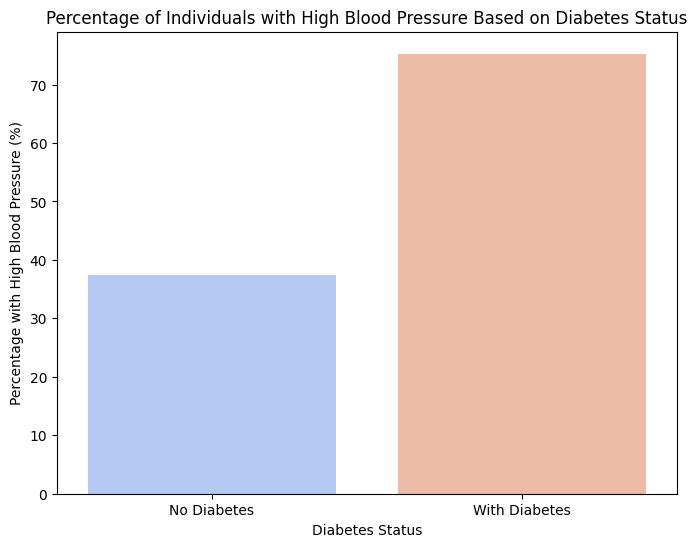

In [ ]:
high_bp_diabetes = df.groupby('Diabetes_binary')['HighBP'].mean().reset_index()
high_bp_diabetes['HighBP'] = high_bp_diabetes['HighBP'] * 100  # Convert to percentage

# Rename columns for better clarity
high_bp_diabetes.columns = ['Diabetes Status', 'Percentage with High Blood Pressure']
high_bp_diabetes['Diabetes Status'] = high_bp_diabetes['Diabetes Status'].replace({0: 'No Diabetes', 1: 'With Diabetes'})

# Print the computed percentages
print(high_bp_diabetes)

# Plot the relationship between diabetes and high blood pressure
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes Status', y='Percentage with High Blood Pressure', data=high_bp_diabetes, palette='coolwarm')
plt.title('Percentage of Individuals with High Blood Pressure Based on Diabetes Status')
plt.ylabel('Percentage with High Blood Pressure (%)')
plt.xlabel('Diabetes Status')

# Show the plot
plt.show()

**The results show a clear link between diabetes and high blood pressure.
Individuals with diabetes are twice as likely (75.27%) to have high blood pressure compared to those without diabetes (37.42%).
This strong association suggests that diabetes and high blood pressure often occur together. High blood pressure can be both a contributing factor to diabetes and a complication that arises in diabetic patients.
Managing blood pressure is crucial for individuals with diabetes because elevated blood pressure can increase the risk of heart disease, stroke, and other complications.**

### Comparison of High Cholesterol Prevalence Between Individuals With and Without Diabetes”

  Diabetes Status  Percentage with High Cholesterol
0     No Diabetes                         38.128784
1   With Diabetes                         67.011826


<ipython-input-32-7b5b36f30899>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




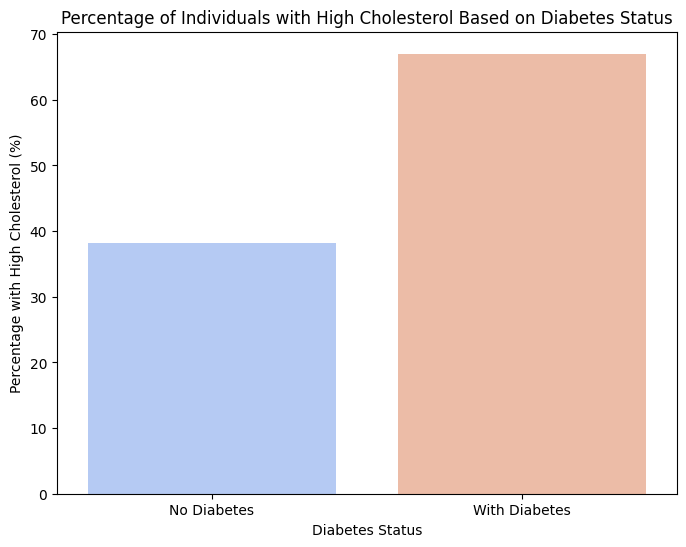

In [ ]:


# Calculate the percentage of individuals with high cholesterol among those with and without diabetes
high_chol_diabetes = df.groupby('Diabetes_binary')['HighChol'].mean().reset_index()
high_chol_diabetes['HighChol'] = high_chol_diabetes['HighChol'] * 100  # Convert to percentage

# Rename columns for better clarity
high_chol_diabetes.columns = ['Diabetes Status', 'Percentage with High Cholesterol']
high_chol_diabetes['Diabetes Status'] = high_chol_diabetes['Diabetes Status'].replace({0: 'No Diabetes', 1: 'With Diabetes'})

# Print the computed percentages
print(high_chol_diabetes)

# Plot the relationship between diabetes and high cholesterol
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes Status', y='Percentage with High Cholesterol', data=high_chol_diabetes, palette='coolwarm')
plt.title('Percentage of Individuals with High Cholesterol Based on Diabetes Status')
plt.ylabel('Percentage with High Cholesterol (%)')
plt.xlabel('Diabetes Status')

# Show the plot
plt.show()

**The data indicates a significant association between diabetes and high cholesterol levels. Specifically, individuals with diabetes are 1.75 times more likely (67.01%) to have high cholesterol compared to those without diabetes (38.13%).**

### Percentage of Diabetic Patients with having Both High Blood Pressure and High Cholesterol




            No High Cholesterol  High Cholesterol
No High BP            48.833219         51.166781
High BP               27.781537         72.218463


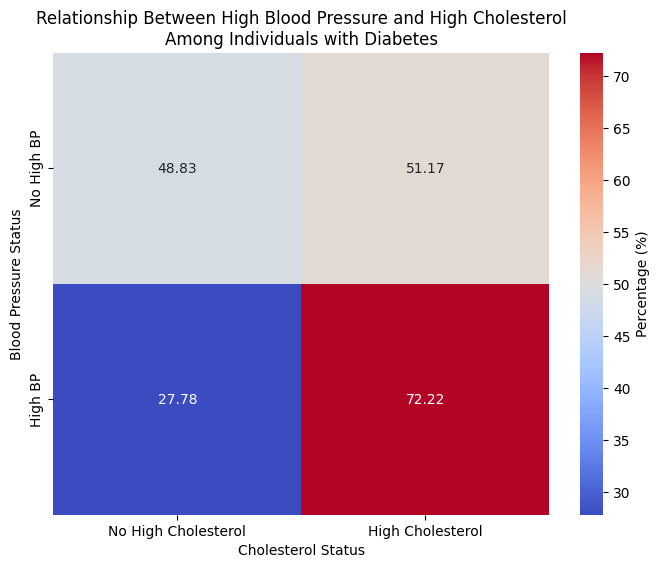

In [ ]:
# Filter data for individuals with diabetes (Diabetes_binary = 1)
df_diabetes = df[df['Diabetes_binary'] == 1]

# Create a crosstab to show the relationship between HighBP and HighChol among diabetes patients
bp_chol_relation = pd.crosstab(df_diabetes['HighBP'], df_diabetes['HighChol'], normalize='index') * 100

# Rename columns and index for better clarity
bp_chol_relation.columns = ['No High Cholesterol', 'High Cholesterol']
bp_chol_relation.index = ['No High BP', 'High BP']

# Print the crosstab for reference
print(bp_chol_relation)

# Plot the relationship using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(bp_chol_relation, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Percentage (%)'})
plt.title('Relationship Between High Blood Pressure and High Cholesterol\nAmong Individuals with Diabetes')
plt.xlabel('Cholesterol Status')
plt.ylabel('Blood Pressure Status')

# Show the plot
plt.show()

**Strong Association Between High BP and High Cholesterol**:
The bottom-right quadrant (72.22%) is the most dominant, indicating that a large percentage of diabetes patients with high blood pressure also have high cholesterol. This suggests a strong correlation between the presence of high blood pressure and high cholesterol among diabetic individuals.

**No High Bp and No High Cholestrol**:
On the other hand, nearly half (48.83%) of the diabetes patients without high blood pressure also do not have high cholesterol, showing that many individuals without high blood pressure tend to have normal cholesterol levels as well.

The results highlight the importance of managing both high blood pressure and high cholesterol in diabetes patients since these conditions tend to occur together.

This analysis could help healthcare professionals focus more on monitoring and managing both conditions in diabetic patients, given the high co-occurrence rates shown in the heatmap.

### Does smoking have a significant impact on the development of diabetes?

In [ ]:
Smoking_DB=pd.crosstab(df.Diabetes_binary,df.Smoker)
Smoking_DB

Smoker,0,1
Diabetes_binary,,
0,20065,15281
1,17029,18317


In [ ]:
print(f'{round(Smoking_DB.iloc[1,1]/Smoking_DB.iloc[:,1].sum()*100,2)}% of people that smoked  had Diabetes')

54.52% of people that smoked  had Diabetes


### How many respondents participate in regular physical activity or exercise, and is there a correlation between their physical activity levels and overall general health?

In [ ]:
PhysActivity=df.PhysActivity.sum()
print(f'The number of respondents that  engaged in regular physical activity or exercise is {round(PhysActivity)} representing {round(PhysActivity/df.PhysActivity.count()*100,2)}%  of the sample space')

The number of respondents that  engaged in regular physical activity or exercise is 49699 representing 70.3%  of the sample space


In [ ]:
GH_PA=df.groupby(['GenHlth'])['PhysActivity'].sum().reset_index().sort_values(by='PhysActivity', ascending=False)
GH_PA.set_index('GenHlth')
GH_PA=GH_PA.rename(index={0: 'Excellent', 1: 'Very good',2: 'Good', 3: 'Fair',4: 'Poor' })
GH_PA

,GenHlth,PhysActivity
Good,3,16389
Very good,2,16116
Fair,4,7516
Excellent,1,7173
Poor,5,2505


In [ ]:
import plotly.express as px
fig = px.pie(GH_PA,
             values='PhysActivity',  # Use total physical activity for values
             names='GenHlth',  # Use the general health status for labels
             color='PhysActivity',  # Color by total physical activity
             color_discrete_sequence=px.colors.sequential.Plasma,  # Use a sequential color scale
             title='Distribution of Total Physical Activity by General Health Status')

# Updating layout
fig.update_layout(
    template='plotly_white',  # Use a light background template
    title_x=0.5  # Center the title
)

# Display the pie chart
fig.show()

**The data indicates that individuals who rate their health as “Good” or “Very Good” are the most likely to engage in physical activity. Interestingly, those who describe their health as “Excellent” are less active than expected, potentially reflecting a confidence in their health that reduces the perceived need for exercise. As health ratings decline, especially among those who consider their health “Fair” or “Poor,” physical activity levels decrease notably.**

### Is there a relationship between reported physical activity levels and the likelihood of a diabetes diagnosis?

In [ ]:
PHA_D=pd.crosstab(df.Diabetes_binary,df.PhysActivity)
PHA_D

PhysActivity,0,1
Diabetes_binary,,
0,7934,27412
1,13059,22287


In [ ]:
print(f'{round(PHA_D.iloc[1,1]/PHA_D.iloc[:,1].sum()*100,2)}% of people that had physical activity had Diabetes')
print(f'{round(PHA_D.iloc[1,1]/PHA_D.iloc[1,:].sum()*100,2)}% of people with  Diabetes had physical activity ')
print(f'{round(PHA_D.iloc[0,0]/PHA_D.iloc[0,:].sum()*100,2)}% of people with no Diabetes   had  no physical activity ')


44.84% of people that had physical activity had Diabetes
63.05% of people with  Diabetes had physical activity 
22.45% of people with no Diabetes   had  no physical activity 


**Of those who participated in physical activity, 44.84% had diabetes, and 63.05% of individuals with diabetes reported being physically active. Additionally, 22.45% of non-diabetics did not engage in physical activity. This suggests that while many people with diabetes are active, the duration of their physical activity habits is unclear.**

**It’s possible that people with diabetes may have recently started exercising as part of their treatment. Conversely, the data also implies that a lack of physical activity could be a contributing risk factor for developing diabetes, although the 30-day activity record may not accurately reflect long-term behaviors.**

### What percentage of respondents have been told they had a stroke?

In [ ]:
# Calculate the total number of respondents
total_respondents = len(df)

# Calculate the number of respondents who have been told they had a stroke
stroke_respondents = df['Stroke'].sum()

# Calculate the percentage of respondents who have been told they had a stroke
stroke_percentage = (stroke_respondents / total_respondents) * 100
print(f'Total percentage of respondents told they had a stroke: {round(stroke_percentage, 2)}%')

# Now, let's calculate it for respondents with and without diabetes
# For respondents with diabetes
diabetes_respondents = df[df['Diabetes_binary'] == 1]
stroke_with_diabetes = diabetes_respondents['Stroke'].sum()
percentage_with_diabetes = (stroke_with_diabetes / len(diabetes_respondents)) * 100
print(f'Percentage of respondents with diabetes told they had a stroke: {round(percentage_with_diabetes, 2)}%')

# For respondents without diabetes
non_diabetes_respondents = df[df['Diabetes_binary'] == 0]
stroke_without_diabetes = non_diabetes_respondents['Stroke'].sum()
percentage_without_diabetes = (stroke_without_diabetes / len(non_diabetes_respondents)) * 100
print(f'Percentage of respondents without diabetes told they had a stroke: {round(percentage_without_diabetes, 2)}%')

Total percentage of respondents told they had a stroke: 6.22%
Percentage of respondents with diabetes told they had a stroke: 9.25%
Percentage of respondents without diabetes told they had a stroke: 3.19%


**This suggests that individuals with diabetes are more likely to have been told they had a stroke compared to those without diabetes. The stroke rate is significantly higher among people with diabetes, indicating a possible link between diabetes and stroke risk.**

### What is the distribution of Body Mass Index (BMI) across the surveyed population, and how does it impact the likelihood of developing diabetes?

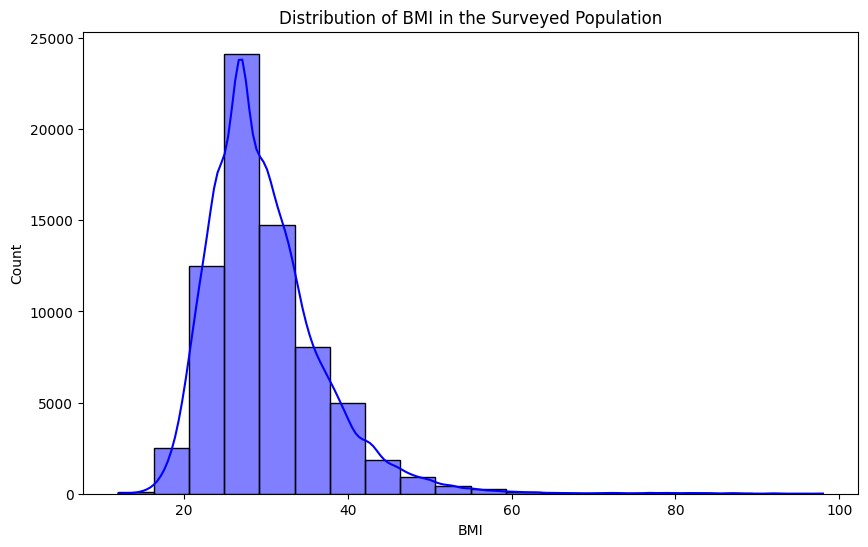

In [ ]:


# Plotting the distribution of BMI for the entire population
plt.figure(figsize=(10, 6))
sns.histplot(df['BMI'], bins=20, kde=True, color='blue')
plt.title('Distribution of BMI in the Surveyed Population')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()



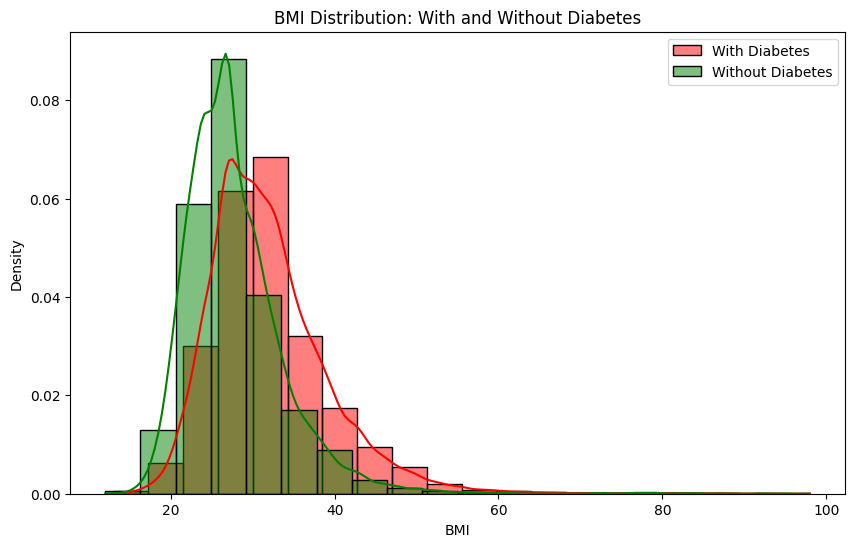

Average BMI for individuals with diabetes: 31.94
Average BMI for individuals without diabetes: 27.77


In [ ]:
# Split data into two groups: with and without diabetes
df_diabetes = df[df['Diabetes_binary'] == 1]
df_no_diabetes = df[df['Diabetes_binary'] == 0]

# Plotting the distribution of BMI for people with and without diabetes
plt.figure(figsize=(10, 6))
sns.histplot(df_diabetes['BMI'], bins=20, kde=True, color='red', label='With Diabetes', stat='density')
sns.histplot(df_no_diabetes['BMI'], bins=20, kde=True, color='green', label='Without Diabetes', stat='density')
plt.title('BMI Distribution: With and Without Diabetes')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.show()

# Calculate and print average BMI for each group
avg_bmi_diabetes = df_diabetes['BMI'].mean()
avg_bmi_no_diabetes = df_no_diabetes['BMI'].mean()

print(f'Average BMI for individuals with diabetes: {avg_bmi_diabetes:.2f}')
print(f'Average BMI for individuals without diabetes: {avg_bmi_no_diabetes:.2f}')

**Higher BMI among individuals with diabetes:** The average BMI for people diagnosed with diabetes is considerably higher than for those without the condition. A BMI of 31.94 falls into the obese category (BMI ≥ 30), suggesting that obesity may be a common trait among individuals with diabetes.


**Lower BMI among individuals without diabetes:** The average BMI for people without diabetes is 27.77, which is in the overweight category (BMI between 25 and 29.9), but notably lower than that of individuals with diabetes.

### Age Distribution Comparison Between Individuals With and Without Diabetes

<ipython-input-13-7522d70ab3ee>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Diabetes_binary', y='Age', data=df, palette='coolwarm')


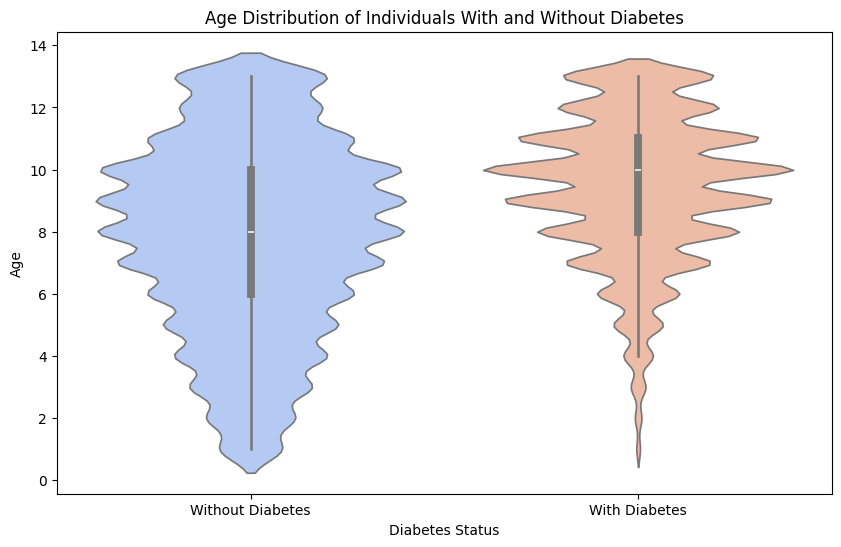

In [ ]:
plt.figure(figsize=(10, 6))

# Create a violin plot to visualize the age distribution for both groups
sns.violinplot(x='Diabetes_binary', y='Age', data=df, palette='coolwarm')

# Modify the x-axis labels to make it clearer
plt.xticks([0, 1], ['Without Diabetes', 'With Diabetes'])

# Add labels and title
plt.title('Age Distribution of Individuals With and Without Diabetes')
plt.xlabel('Diabetes Status')
plt.ylabel('Age')

# Show the plot
plt.show()

**The age distribution for both individuals with and without diabetes spans a similar range.
There is a slight difference in where the majority of individuals' ages cluster, with those without diabetes being slightly older on average.
The distribution is smoother and more spread out for individuals without diabetes compared to those with diabetes, who tend to cluster more tightly around a specific age range.**

### The number of respondents categorized as heavy drinkers, along with an analysis of their characteristics, provides valuable insights into patterns related to alcohol consumption.

In [ ]:
df.HvyAlcoholConsump.sum()

3020

In [ ]:
pd.crosstab(df.Sex,df.HvyAlcoholConsump,margins=False)

HvyAlcoholConsump,0,1
Sex,,
0,36847,1539
1,30825,1481


In [ ]:
pd.crosstab(df.Diabetes_binary,df.HvyAlcoholConsump,margins=False)

HvyAlcoholConsump,0,1
Diabetes_binary,,
0,33158,2188
1,34514,832


**The data indicates that a smaller proportion of people with diabetes consume alcohol heavily compared to those without diabetes, suggesting a weak or potentially non-significant association between heavy alcohol consumption and diabetes in this dataset.**

### Association Between Diabetes and Heart Disease/Attack

In [ ]:
heart_disease_diabetes = pd.crosstab(df['Diabetes_binary'], df['HeartDiseaseorAttack'],
                                      rownames=['Diabetes Status'],
                                      colnames=['Heart Disease/Attack'],
                                      margins=True)

print(heart_disease_diabetes)

Heart Disease/Attack      0      1    All
Diabetes Status                          
0                     32775   2571  35346
1                     27468   7878  35346
All                   60243  10449  70692


In [ ]:
# Calculate percentages
heart_disease_percentage = heart_disease_diabetes.div(heart_disease_diabetes.iloc[:, -1], axis=0) * 100
print(heart_disease_percentage)

Heart Disease/Attack          0          1    All
Diabetes Status                                  
0                     92.726192   7.273808  100.0
1                     77.711764  22.288236  100.0
All                   85.218978  14.781022  100.0


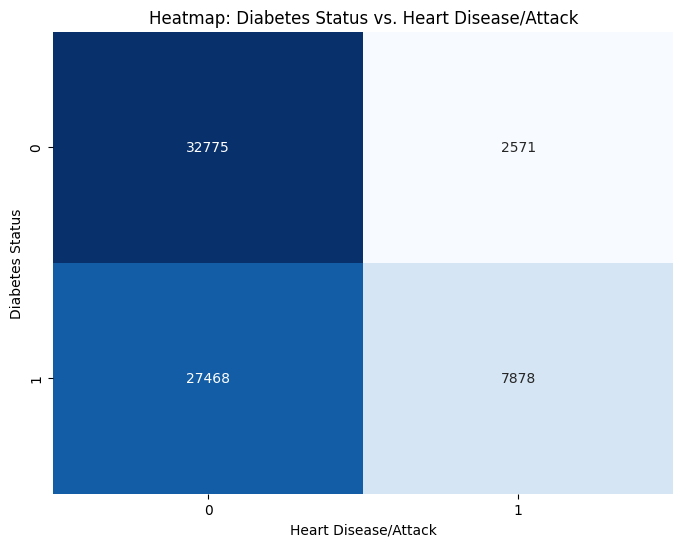

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(heart_disease_diabetes.iloc[:-1, :-1], annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Heatmap: Diabetes Status vs. Heart Disease/Attack')
plt.xlabel('Heart Disease/Attack')
plt.ylabel('Diabetes Status')
plt.show()

**Most individuals in the dataset have neither diabetes nor heart disease (32,775).
The group of individuals with both diabetes and heart disease/attack is smaller but still significant (7,878).
It highlights that diabetes and heart disease are somewhat correlated, with a significant number of individuals experiencing both conditions.**

### Correlation Between General Health and Diabetes Prevalence: A Gradient from Excellent to Poor Health

Diabetes_binary      0      1    All
GenHlth                             
Excellent         7142   1140   8282
Fair              3513   9790  13303
Good              9970  13457  23427
Poor              1230   4578   5808
Very Good        13491   6381  19872
All              35346  35346  70692


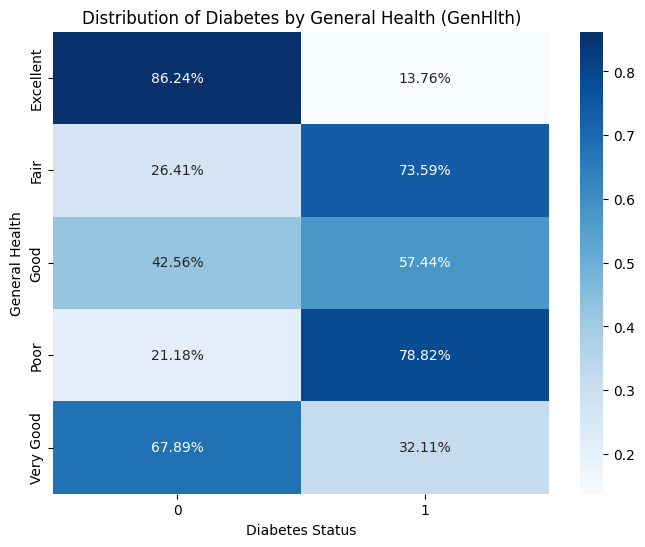

Chi-square Test:
Chi2 value: 12304.318979903526
P-value: 0.0
Degrees of Freedom: 4


In [ ]:

from scipy.stats import chi2_contingency

# Mapping GenHlth values to more descriptive labels
df['GenHlth'] = df['GenHlth'].map({1: 'Excellent', 2: 'Very Good', 3: 'Good', 4: 'Fair', 5: 'Poor'})

# Cross-tabulation: Relationship between General Health (GenHlth) and Diabetes (Diabetes_binary)
genhlth_diabetes_ct = pd.crosstab(df['GenHlth'], df['Diabetes_binary'], margins=True)

# Display the cross-tabulation
print(genhlth_diabetes_ct)

# Plotting the cross-tabulation for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df['GenHlth'], df['Diabetes_binary'], normalize='index'),
            annot=True, cmap='Blues', fmt='.2%')
plt.title("Distribution of Diabetes by General Health (GenHlth)")
plt.xlabel("Diabetes Status")
plt.ylabel("General Health")
plt.show()

# Performing a Chi-square test for independence
chi2_stat, p_val, dof, ex = chi2_contingency(pd.crosstab(df['GenHlth'], df['Diabetes_binary']))

# Display the result of the Chi-square test
print(f"Chi-square Test:\nChi2 value: {chi2_stat}\nP-value: {p_val}\nDegrees of Freedom: {dof}")



**The analysis of General Health (GenHlth) and Diabetes Status reveals a clear trend: individuals who rate their health as "Poor" have the highest prevalence of diabetes, with 78.82% of them diagnosed. In contrast, those reporting "Excellent" health show a much lower diabetes rate at 13.76%. The data indicates a strong correlation between worsening self-perceived health and higher diabetes incidence, with "Fair" and "Good" health ratings also showing moderate diabetes prevalence. This highlights how deteriorating general health is closely linked to the likelihood of having diabetes.**

### Distribution of Vegetables and Fruit Consumption Across General Health Categories

**The data suggests a positive correlation between vegetable consumption and better general health. Individuals who consume vegetables tend to report being in “Very good” or “Good” health, while those who do not consume vegetables are more likely to be in “Fair” or “Poor” health. This implies that regular vegetable consumption may be associated with improved general health status. However, there are also a notable number of individuals in “Good” or “Very good” health who do not report consuming vegetables, indicating that other factors may contribute to their health.**

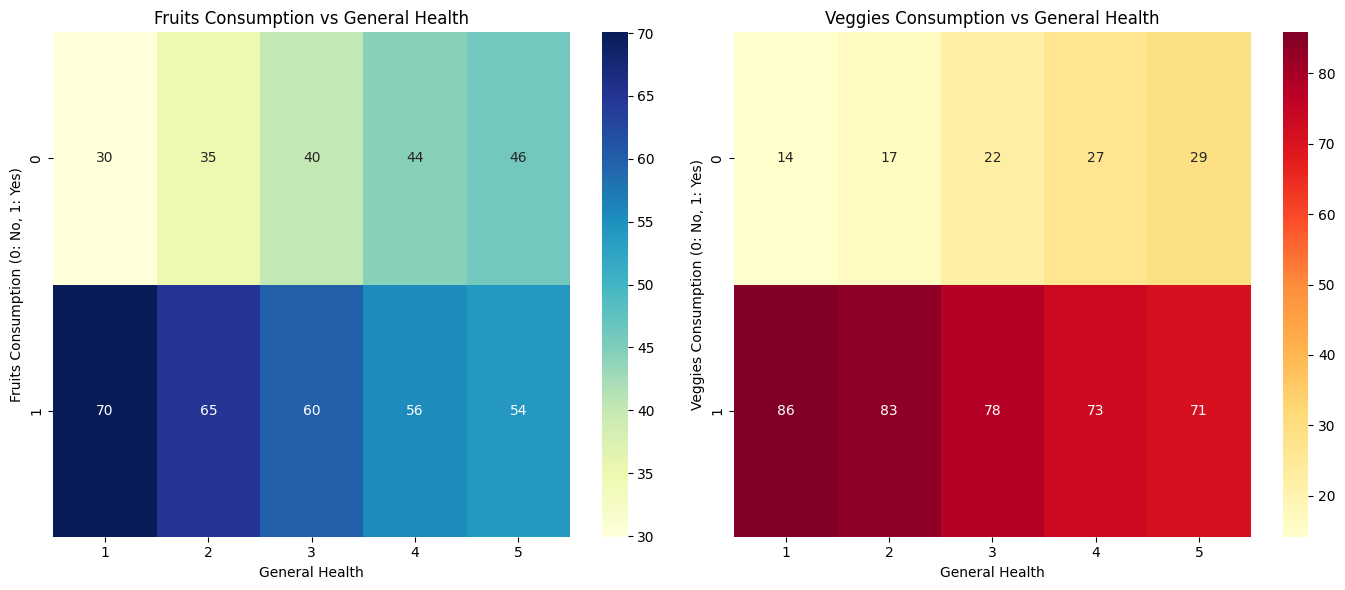

In [ ]:
# Create crosstabs for Fruits and Veggies consumption with GenHlth
fruit_genhlth = pd.crosstab(df['Fruits'], df['GenHlth'], normalize='columns') * 100
veggie_genhlth = pd.crosstab(df['Veggies'], df['GenHlth'], normalize='columns') * 100

# Set up a matplotlib figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Heatmap for Fruits vs GenHlth
sns.heatmap(fruit_genhlth, annot=True, cmap='YlGnBu', ax=axes[0])
axes[0].set_title('Fruits Consumption vs General Health')
axes[0].set_xlabel('General Health')
axes[0].set_ylabel('Fruits Consumption (0: No, 1: Yes)')

# Heatmap for Veggies vs GenHlth
sns.heatmap(veggie_genhlth, annot=True, cmap='YlOrRd', ax=axes[1])
axes[1].set_title('Veggies Consumption vs General Health')
axes[1].set_xlabel('General Health')
axes[1].set_ylabel('Veggies Consumption (0: No, 1: Yes)')

# Adjust layout
plt.tight_layout()
plt.show()

**The data suggests a positive correlation between vegetable anf fruits  consumption and better general health. Individuals who consume vegetables and fruits tend to report being in “Very good” or “Good” health, while those who do not consume vegetables are more likely to be in “Fair” or “Poor” health. This implies that regular vegetable   and  fruits consumption may be associated with improved general health status. However, there are also a notable number of individuals in “Good” or “Very good” health who do not report consuming vegetables, indicating that other factors may contribute to their health.**

### Income Level Distribution by Diabetes Status

<ipython-input-6-39018d7b6441>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Diabetes_binary', y='Income', palette='coolwarm')


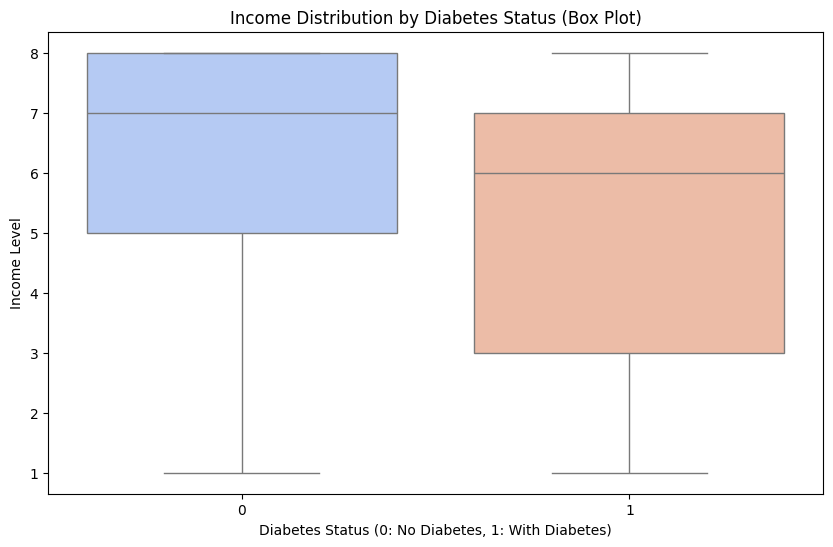

In [ ]:
# Box plot to show the distribution of income across diabetes status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Diabetes_binary', y='Income', palette='coolwarm')
plt.title('Income Distribution by Diabetes Status (Box Plot)')
plt.xlabel('Diabetes Status (0: No Diabetes, 1: With Diabetes)')
plt.ylabel('Income Level')
plt.show()



### Count of Individuals by Income Level and Diabetes Status

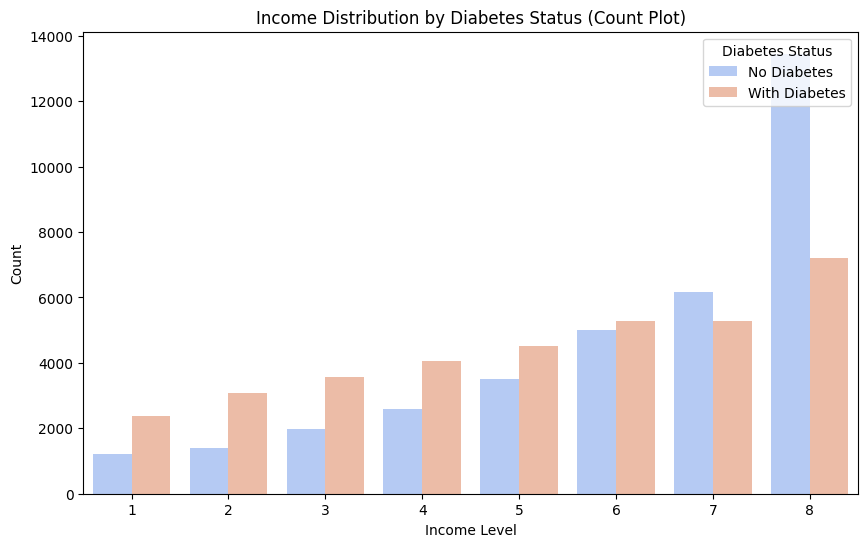

In [ ]:
# Bar plot to show the count of individuals in each income category by diabetes status
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income', hue='Diabetes_binary', palette='coolwarm')
plt.title('Income Distribution by Diabetes Status (Count Plot)')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', loc='upper right', labels=['No Diabetes', 'With Diabetes'])
plt.show()

**Individuals with diabetes tend to have lower median income levels compared to those without diabetes. Additionally, the range of income for diabetic individuals is slightly narrower, with more people clustered in the lower income brackets. This suggests a possible relationship between lower income levels and the prevalence of diabetes, which could reflect socio-economic factors influencing health outcomes.**

### Examining Heavy Alcohol Use: Insights from Diabetes Status Among Respondents

In [ ]:
# Alcohol Consumption Analysis
total_alcohol_consumption = df['HvyAlcoholConsump'].sum()
percentage_alcohol_consumption = (total_alcohol_consumption / len(df)) * 100
print(f'Total percentage of respondents identified as heavy alcohol consumers: {round(percentage_alcohol_consumption, 2)}%')


Total percentage of respondents identified as heavy alcohol consumers: 4.27%


In [ ]:
# For individuals with diabetes
alcohol_consumption_diabetes = df[df['Diabetes_binary'] == 1]['HvyAlcoholConsump'].sum()
percentage_alcohol_consumption_diabetes = (alcohol_consumption_diabetes / len(df[df['Diabetes_binary'] == 1])) * 100
print(f'Percentage of individuals with diabetes identified as heavy alcohol consumers: {round(percentage_alcohol_consumption_diabetes, 2)}%')


Percentage of individuals with diabetes identified as heavy alcohol consumers: 2.35%


In [ ]:
# For individuals without diabetes
alcohol_consumption_no_diabetes = df[df['Diabetes_binary'] == 0]['HvyAlcoholConsump'].sum()
percentage_alcohol_consumption_no_diabetes = (alcohol_consumption_no_diabetes / len(df[df['Diabetes_binary'] == 0])) * 100
print(f'Percentage of individuals without diabetes identified as heavy alcohol consumers: {round(percentage_alcohol_consumption_no_diabetes, 2)}%')


Percentage of individuals without diabetes identified as heavy alcohol consumers: 6.19%


**The percentage of heavy alcohol consumers is significantly lower among individuals with diabetes (2.35%) compared to those without diabetes (6.19%).
This could suggest that individuals with diabetes may be more cautious about their alcohol consumption due to health concerns and the potential adverse effects of alcohol on blood sugar levels and overall health.**


### In our extensive Exploratory Data Analysis (EDA) of diabetes risk factors, several important insights emerged:

 **1.Link Between Diabetes and High Blood Pressure:** Individuals with diabetes are significantly more likely to have high blood pressure (75.27%) compared to those without diabetes (37.42%). This suggests a strong association between the two conditions, highlighting the importance of managing blood pressure in diabetic patients to reduce the risk of cardiovascular complications.

 **2.Diabetes and High Cholesterol Correlation:** The analysis reveals that individuals with diabetes are 1.75 times more likely (67.01%) to have high cholesterol than those without diabetes (38.13%). This indicates a notable correlation between diabetes and high cholesterol levels.

 **3.High Blood Pressure and High Cholesterol in Diabetics:** A significant majority (72.22%) of diabetes patients with high blood pressure also present with high cholesterol, indicating a strong relationship between these two conditions in individuals with diabetes.

 **4.Normal Blood Pressure and Cholesterol Levels:** Among diabetes patients without high blood pressure, nearly half (48.83%) also do not have high cholesterol. This suggests that those without high blood pressure tend to maintain normal cholesterol levels.

 **5.Need for Dual Condition Management:** The co-occurrence of high blood pressure and high cholesterol in diabetes patients emphasizes the necessity for healthcare professionals to monitor and manage both conditions effectively.

 **6.Smoking and Diabetes Risk:** Approximately 54.52% of smokers in the study reported having diabetes, indicating a potential link between smoking and increased diabetes risk.

 **7.Physical Activity and Diabetes:** While 63.05% of individuals with diabetes reported being physically active, 22.45% of non-diabetics did not engage in physical activity. This suggests that physical inactivity may be a risk factor for developing diabetes, although the data on activity may not reflect long-term habits.

 **8.Stroke Prevalence:** The prevalence of stroke is higher among individuals with diabetes (9.25%) compared to those without (3.19%), underscoring the increased health risks associated with diabetes.

 **9.BMI Differences:** Individuals diagnosed with diabetes have a significantly higher average BMI (31.94) compared to non-diabetics (27.77), indicating a correlation between obesity and diabetes.

 **10.Age Group Overlap:** There is notable overlap in age groups between individuals with and without diabetes, with a higher density of diabetes observed in older populations, particularly among middle-aged and elderly individuals.

 **11.Alcohol Consumption:** The data suggests a weak or non-significant association between heavy alcohol consumption and diabetes, as fewer individuals with diabetes reported heavy drinking compared to those without.

 **12.Diabetes and Heart Disease Correlation:** A smaller proportion of individuals have both diabetes and heart disease (7,878), indicating a correlation between these conditions.

 **13.General Health Perception:** Individuals rating their health as "Poor" exhibit the highest prevalence of diabetes (78.82%), while those in "Excellent" health have a much lower prevalence (13.76%). This suggests a strong correlation between perceived health status and diabetes incidence.



**Based on these insights, here are several recommendations for managing diabetes and associated health risks:**

**1.Prioritize Blood Pressure Management for Diabetics:** Given the strong association between diabetes and high blood pressure (75.27%), it is crucial for healthcare providers to monitor and manage blood pressure regularly in diabetic patients. Early interventions, such as antihypertensive medications and lifestyle changes, can help reduce cardiovascular risks.

**2.Monitor Cholesterol Levels in Diabetics:** Since individuals with diabetes are 1.75 times more likely to have high cholesterol, regular screening for cholesterol levels should be emphasized. Physicians should consider prescribing statins or other lipid-lowering medications for diabetic patients to reduce the risk of heart disease and stroke.

**3.Address Dual Conditions (High BP & High Cholesterol):** The high co-occurrence of high blood pressure and high cholesterol (72.22%) among diabetes patients calls for integrated management strategies. Healthcare teams should develop comprehensive treatment plans to address both conditions simultaneously, optimizing medication adherence and lifestyle modifications.

**4.Promote Heart-Healthy Lifestyles:** For diabetic patients without high blood pressure, nearly half maintain normal cholesterol levels. This suggests the potential for lifestyle interventions (such as diet, exercise, and smoking cessation) to help maintain normal cholesterol and blood pressure levels in diabetes patients.

**5.Smoking Cessation Programs:** Since more than half of smokers (54.52%) in the study have diabetes, healthcare professionals should encourage and support smoking cessation programs. Smoking is a significant risk factor for multiple chronic conditions, and reducing smoking rates among diabetics can help lower complications.

**6.Encourage Physical Activity:** While many individuals with diabetes engage in physical activity (63.05%), promoting more sustained and long-term exercise habits could further reduce diabetes risks, especially among non-diabetics. Community programs that encourage regular exercise should target individuals at high risk of diabetes to prevent onset.

**7.Incorporate Stroke Prevention in Diabetes Care:** With a higher prevalence of stroke among diabetics (9.25%), stroke prevention should be part of diabetes management. This includes controlling blood pressure, maintaining healthy cholesterol levels, and promoting a heart-healthy lifestyle.

**8.Target Obesity in Diabetes Prevention Efforts:** The higher average BMI in diabetics (31.94 vs. 27.77) suggests that addressing obesity should be a key focus in diabetes prevention and management. Weight-loss programs, dietary interventions, and physical activity campaigns targeting individuals with high BMIs could mitigate diabetes risks.

**9.Age-Specific Interventions**: Given the higher prevalence of diabetes in older populations, particularly among middle-aged and elderly individuals, tailored prevention programs should focus on these age groups. Regular screenings and early detection initiatives can help manage diabetes risk factors in aging populations.

**10.Refine Alcohol Consumption Guidelines:** Although alcohol consumption does not appear to have a strong correlation with diabetes, individuals with diabetes should still be advised to limit heavy drinking to avoid complications that may arise from excessive alcohol use, such as liver problems or heart disease.

**11.Heart Disease Monitoring:** Since diabetes and heart disease are correlated, regular cardiovascular check-ups and heart health monitoring should be a priority for diabetic patients. Proactive heart disease prevention strategies, including medication and lifestyle changes, should be incorporated into diabetes care plans.

**12.Address Perceived Poor Health:** The strong correlation between poor self-rated health and diabetes (78.82%) indicates that individuals who perceive their health as poor may be at higher risk. Health professionals should target these individuals with preventive measures, health education, and management plans to reduce their risk of developing diabetes or worsening their condition.

### Pros and Cons of Using a Balanced Sample

Pros:

	1.Reduced Bias:
	•	A balanced sample ensures equal representation of classes (e.g., equal number of individuals with and without diabetes). This can prevent the model from being biassed towards the more prevalent class, leading to fairer and more reliable conclusions.

	2.Improved Model Performance:
	•	For machine learning models, a balanced sample can improve the ability of the model to correctly identify minority classes (e.g., in health surveys, where fewer individuals may have rare diseases). It ensures that both positive and negative classes are well-represented, thus preventing the model from focusing only on the majority class.

	3.Enhanced Interpretability:
	•	Balanced data make it easier to interpret relationships and trends, as you avoid the risk of skewed results where one group dominates the sample. This is particularly useful in exploratory data analysis or survey insights.

	4.Better Generalization:
	•	In some cases, a balanced sample allows models to generalise better, especially if the target population has an even distribution of the outcome of interest. It helps to avoid overfitting to one class and generalises well across different subgroups.

Cons:

	1.Unrealistic Representation:
	•	Real-world data often exhibit imbalances (e.g., more non-diabetic individuals than diabetic ones). Using a balanced sample might give a misleading picture of the actual distribution of the population and result in conclusions that don’t reflect the real-world scenario.
	2.Overcompensation:
	•	By forcing balance, you might over-sample a minority class and introduce noise or anomalies that aren’t representative of the population. This can cause a model to learn from synthetic or duplicated data points instead of the real patterns in the data.
	3.Skewed Model Accuracy:
	•	While models trained on balanced samples might perform better on minority classes, they could be less accurate for the majority class in real-world scenarios. This trade-off can affect performance metrics such as accuracy, precision, and recall when applied to naturally imbalanced test data.
	4.Loss of Statistical Power:
	•	If the original dataset is imbalanced, down-sampling the majority class or up-sampling the minority class may reduce the statistical power of your analysis by reducing the actual variation and meaningful patterns in the original data.

Refining Survey Questions for Better Insights

To derive deeper insights from survey data, refining certain questions can enhance the quality and granularity of the data. Here are some suggestions for improving the survey questions related to diabetes and other health conditions:

	1.	Current Questions:
	•	Questions like “Do you have diabetes?” or “Do you have high cholesterol?” are simple, but they lack depth. These are typically yes/no questions, which don’t capture information about severity, management, or progression.

Refinement:

	•	Instead of simple binary responses, consider adding follow-up questions:
	•	“How long ago were you diagnosed with diabetes?” (Duration)
	•	“What is your current method of diabetes management?” (Lifestyle changes, medication, etc.)
	•	“How frequently do you monitor your blood sugar levels?” (Engagement in care)
	•	This would give more nuanced data about whether better health management correlates with other lifestyle variables, like physical activity.
	2.	Health Behavior Questions:
	•	Questions related to health behaviors, like physical activity, are often framed as simple yes/no questions: “Do you engage in physical activity?”

Refinement:

	•	To get a clearer picture of respondents’ activity levels, you could break it down:
	•	“How often do you engage in physical activity?” (Daily, weekly, rarely, never)
	•	“What kind of physical activity do you engage in?” (Cardio, strength training, walking)
	•	This will provide more granular insights into the relationship between physical activity levels and diabetes prevalence.
	3.	Mental Health and Stress:
	•	Mental health is often overlooked in lifestyle-related diseases. Questions like “Have you experienced any mental health issues?” might not capture the full extent of stress or depression’s impact on diabetes.

Refinement:

	•	Add questions like:
	•	“How often do you feel stressed?” (Daily, weekly, rarely, never)
	•	“Have you been diagnosed with a mental health condition, such as depression or anxiety?”
	•	“How do you typically manage stress?” (Exercise, diet, medication)
	•	This could shed light on whether mental health issues contribute to poor lifestyle choices linked to diabetes.
	4.	Dietary Habits:
	•	Simple yes/no questions like “Do you eat fruits and vegetables?” provide limited insight into the quality and frequency of diet.
Refinement:
	•	You could ask more detailed questions:
	•	“How many servings of fruits/vegetables do you eat per day?”
	•	“How often do you consume processed foods or sugary beverages?”
	•	These refinements can help reveal specific dietary patterns that correlate with diabetes risk.

Conclusion

	•	Balanced Data: Using a balanced sample in diabetes-related studies can improve the accuracy of predictive models, but at the cost of potentially distorting the representativeness of the population and introducing biases.
	•	Refining Survey Questions: By asking more detailed and nuanced questions, especially about lifestyle, mental health, and disease management, you can gain deeper insights into the factors that influence diabetes, leading to more actionable findings.




